In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
#Adapted from Introduction to Statistical Learning

In [36]:
df = pd.read_csv(r"C:\Users\bryan\Desktop\datasets/ads.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


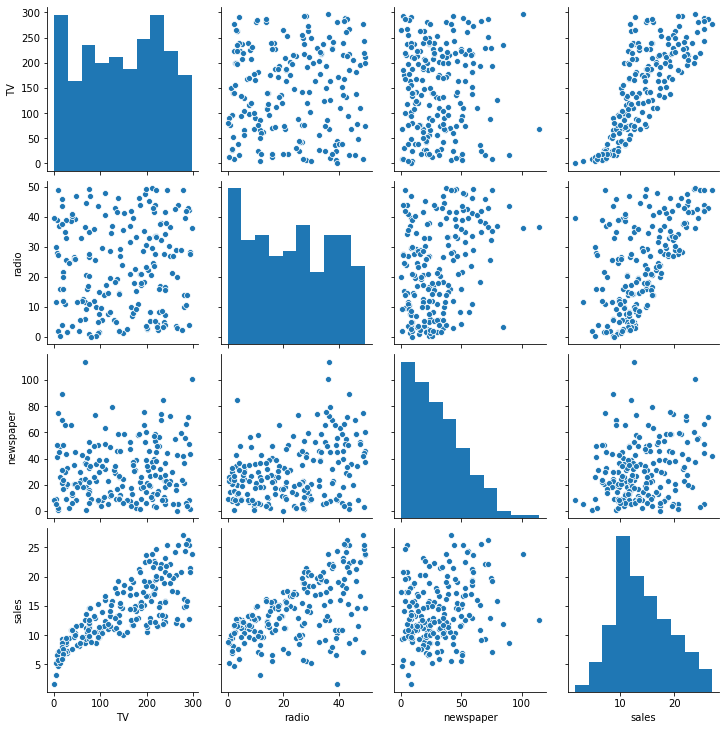

In [37]:
sns.pairplot(df)

In [38]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [39]:
X = df[['TV','radio']]
y = df['sales']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lin = LinearRegression()

In [44]:
lin.fit(X, y)

LinearRegression()

In [45]:
y_pred = lin.predict(X)

In [46]:
import statsmodels.formula.api as smf

est = smf.ols('sales ~ radio + TV', data=df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           4.83e-98
Time:                        13:39:34   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
radio          0.1880      0.008     23.382      0.000       0.172       0.204
TV             0.0458      0.001     32.909      0.000       0.043       0.048
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
print("Residual sum of squares: %.2f"
  % ((y_pred - y) ** 2).sum())

Residual sum of squares: 556.91


In [48]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)
r2

0.8971942610828956

In [49]:
from sklearn import metrics

metrics.mean_absolute_error(y, y_pred)

1.2537471644234004

In [50]:
metrics.mean_squared_error(y, y_pred)

2.784569900338092

In [51]:
np.sqrt(metrics.mean_absolute_error(y, y_pred))

1.1197085176167056

In [58]:
num_data = X.shape[0]
mse = mean_squared_error(y,y_pred)
rmse = math.sqrt(mse/num_data)
rse = math.sqrt(mse/(num_data-2))
rsquare=lin.score(X,y)
mae=mean_absolute_error(y,y_pred)

print(mse)
print(rmse)
print(rse)
print(rsquare)
print(mae)

2.784569900338092
0.11799512490645729
0.11858956254722368
0.8971942610828956
1.2537471644234004


In [59]:
X_new = [[230.1, 37.8]]

In [60]:
pred = lin.predict(X_new)

In [61]:
pred

array([20.55546463])

In [62]:
intercept = lin.intercept_
intercept

2.9210999124051362

In [63]:
coef = lin.coef_[0]
coef

0.04575481510107616

In [64]:
coef2 = lin.coef_[1]
coef2

0.18799422662030923

In [65]:
ste1 = est.bse[0]

In [66]:
ste2 = est.bse[1]

In [67]:
ste3 = est.bse[2]

In [68]:
B00 = intercept - 2*ste1
B00

2.3321205557025015

In [69]:
B01 = intercept + 2*ste1
B01

3.510079269107771

In [70]:
B10 = coef - 2*ste2
B10

0.029674869782889562

In [71]:
B11 = coef + 2*ste2
B11

0.06183476041926275

In [72]:
B20 = coef2 - 2*ste3

In [73]:
B20 = coef2 + 2*ste3

C:\Users\bryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.


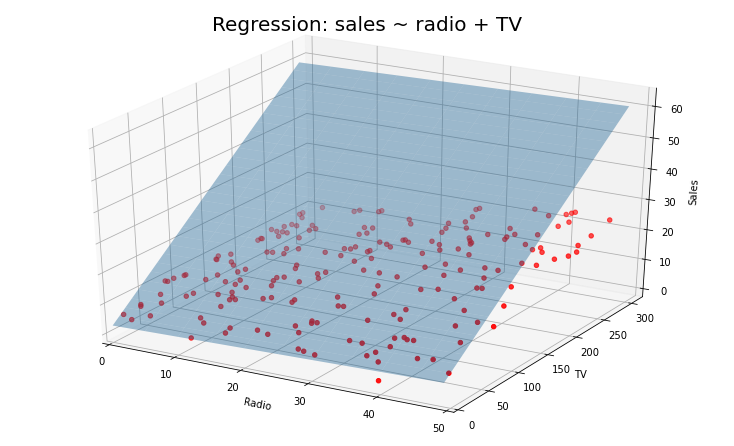

In [74]:
from mpl_toolkits.mplot3d import axes3d

radio = np.arange(0,50)

TV = np.arange(0,300)

Z = np.zeros((TV.size, radio.size))

B1, B2 = np.meshgrid(radio, TV)

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(lin.intercept_ + B1[i,j]*lin.coef_[0] + B2[i,j]*lin.coef_[1])

fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: sales ~ radio + TV', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(df.radio, df.TV, df.sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales');